4.ipynb의 코드에서 몇가지 문제 풀어보기
1) train_scaled의 산점도 찍어보기
2) test_scaled의 산점도 찍어보기


[1]
1.0


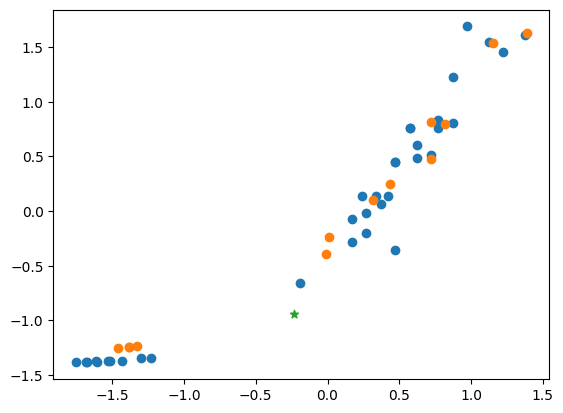

In [9]:
import numpy as np #파이선이 제공하는 수학 함수
import matplotlib.pyplot as plt
#사이킷 런 패키지
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
kn = KNeighborsClassifier(n_neighbors=5)

#물고기 데이터(돔+빙어)
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0,
                9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0,
                6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)]
#1은 돔, 0은 빙어
fish_target = [1]*35 + [0]*14

train_input,test_input, train_target,test_target = train_test_split(fish_data,fish_target, stratify=fish_target, random_state=42)

mean = np.mean(train_input,axis= 0)
mean_test = np.mean(test_input,axis= 0)
std = np.std(train_input,axis= 0)
std_test = np.std(test_input,axis= 0)

#스케일링
train_scaled = (train_input-mean)/std
test_scaled = (test_input-mean_test)/std_test
kn.fit(train_scaled,train_target)

#확인할때도 표준점수로 변형시킨것을 넣어야함.
new = ([25,150]-mean)/std
print(kn.predict([new]))
print(kn.score(test_scaled,test_target))

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(test_scaled[:,0],test_scaled[:,1])
plt.scatter(new[0],new[1],marker='*')
plt.show()



In [11]:
import numpy as np #파이선이 제공하는 수학 함수
import matplotlib.pyplot as plt
#사이킷 런 패키지
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
kn = KNeighborsClassifier(n_neighbors=5)

#물고기 데이터(돔+빙어)
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0,
                9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0,
                6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)]
#1은 돔, 0은 빙어
fish_target = [1]*35 + [0]*14

train_input,test_input, train_target,test_target = train_test_split(fish_data,fish_target, stratify=fish_target, random_state=42)

#스케일링 없이 정확도 출력
kn.fit(train_input,train_target)
print(kn.score(test_input,test_target))
#98% 이상이어야함.

1.0
